<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%208/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s8'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate

In [4]:
classes, trainloader, testloader = data_loading.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


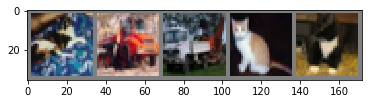

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = MultiStepLR(optimizer, milestones=[10,13,15], gamma=0.1)

In [8]:

EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.5971373319625854 Batch_id=390 Accuracy=29.68: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 4255/10000 (42.55%)

EPOCH: 2 LR: 0.1


Loss=1.3908355236053467 Batch_id=390 Accuracy=50.30: 100%|██████████| 391/391 [00:31<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 5706/10000 (57.06%)

EPOCH: 3 LR: 0.1


Loss=0.9335561990737915 Batch_id=390 Accuracy=61.14: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6192/10000 (61.92%)

EPOCH: 4 LR: 0.1


Loss=0.8426440358161926 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:30<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6959/10000 (69.59%)

EPOCH: 5 LR: 0.1


Loss=0.609618604183197 Batch_id=390 Accuracy=74.52: 100%|██████████| 391/391 [00:31<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7098/10000 (70.98%)

EPOCH: 6 LR: 0.1


Loss=0.5603557825088501 Batch_id=390 Accuracy=78.23: 100%|██████████| 391/391 [00:30<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7449/10000 (74.49%)

EPOCH: 7 LR: 0.1


Loss=0.6042784452438354 Batch_id=390 Accuracy=81.38: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7723/10000 (77.23%)

EPOCH: 8 LR: 0.1


Loss=0.7243821024894714 Batch_id=390 Accuracy=83.17: 100%|██████████| 391/391 [00:30<00:00, 13.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7802/10000 (78.02%)

EPOCH: 9 LR: 0.1


Loss=0.4854341149330139 Batch_id=390 Accuracy=84.75: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7938/10000 (79.38%)

EPOCH: 10 LR: 0.1


Loss=0.48524385690689087 Batch_id=390 Accuracy=85.82: 100%|██████████| 391/391 [00:30<00:00, 13.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7792/10000 (77.92%)

EPOCH: 11 LR: 0.010000000000000002


Loss=0.21378132700920105 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [00:31<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8664/10000 (86.64%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.14581522345542908 Batch_id=390 Accuracy=96.54: 100%|██████████| 391/391 [00:30<00:00, 13.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8660/10000 (86.60%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.09039582312107086 Batch_id=390 Accuracy=97.78: 100%|██████████| 391/391 [00:30<00:00, 13.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8702/10000 (87.02%)

EPOCH: 14 LR: 0.0010000000000000002


Loss=0.0651538074016571 Batch_id=390 Accuracy=98.84: 100%|██████████| 391/391 [00:30<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8699/10000 (86.99%)

EPOCH: 15 LR: 0.0010000000000000002


Loss=0.016569506376981735 Batch_id=390 Accuracy=99.05: 100%|██████████| 391/391 [00:31<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8726/10000 (87.26%)

EPOCH: 16 LR: 0.00010000000000000003


Loss=0.05092785507440567 Batch_id=390 Accuracy=99.15: 100%|██████████| 391/391 [00:31<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8723/10000 (87.23%)

EPOCH: 17 LR: 0.00010000000000000003


Loss=0.04671851545572281 Batch_id=390 Accuracy=99.12: 100%|██████████| 391/391 [00:30<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8716/10000 (87.16%)

EPOCH: 18 LR: 0.00010000000000000003


Loss=0.05552821606397629 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8717/10000 (87.17%)

EPOCH: 19 LR: 0.00010000000000000003


Loss=0.06317327916622162 Batch_id=390 Accuracy=99.18: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8705/10000 (87.05%)

EPOCH: 20 LR: 0.00010000000000000003


Loss=0.06697026640176773 Batch_id=390 Accuracy=99.08: 100%|██████████| 391/391 [00:31<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8722/10000 (87.22%)

EPOCH: 21 LR: 0.00010000000000000003


Loss=0.026319563388824463 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [00:30<00:00, 13.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8715/10000 (87.15%)

EPOCH: 22 LR: 0.00010000000000000003


Loss=0.051699090749025345 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [00:31<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8726/10000 (87.26%)

EPOCH: 23 LR: 0.00010000000000000003


Loss=0.02219628170132637 Batch_id=390 Accuracy=99.18: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8721/10000 (87.21%)

EPOCH: 24 LR: 0.00010000000000000003


Loss=0.03816375881433487 Batch_id=390 Accuracy=99.14: 100%|██████████| 391/391 [00:31<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8707/10000 (87.07%)

EPOCH: 25 LR: 0.00010000000000000003


Loss=0.06717289984226227 Batch_id=390 Accuracy=99.17: 100%|██████████| 391/391 [00:31<00:00, 13.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8719/10000 (87.19%)

EPOCH: 26 LR: 0.00010000000000000003


Loss=0.014595734886825085 Batch_id=390 Accuracy=99.21: 100%|██████████| 391/391 [00:30<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8720/10000 (87.20%)

EPOCH: 27 LR: 0.00010000000000000003


Loss=0.035962097346782684 Batch_id=390 Accuracy=99.15: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8726/10000 (87.26%)

EPOCH: 28 LR: 0.00010000000000000003


Loss=0.03014182485640049 Batch_id=390 Accuracy=99.16: 100%|██████████| 391/391 [00:30<00:00, 13.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8718/10000 (87.18%)

EPOCH: 29 LR: 0.00010000000000000003


Loss=0.058505892753601074 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8713/10000 (87.13%)

EPOCH: 30 LR: 0.00010000000000000003


Loss=0.05488462373614311 Batch_id=390 Accuracy=99.20: 100%|██████████| 391/391 [00:30<00:00, 13.71it/s]



Test set: Average loss: 0.0034, Accuracy: 8715/10000 (87.15%)



GroundTruth:   ship horse plane  bird   dog
Predicted:   ship horse  ship  bird   dog


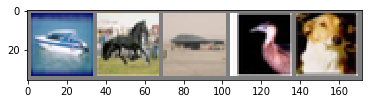

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 87 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 88 %
Accuracy of   cat : 72 %
Accuracy of  deer : 78 %
Accuracy of   dog : 71 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %
